### **Inverse Problems: Final Project**
#### *Green’s function estimation from ambient noise signals in 2D*
##### **Author**: Naïl Khelifa

In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

## Preliminaries

The homogeneous two-dimensional Green's function $\hat{G}(\omega, x, y)$ is a solution to the equation

$$
\Delta_x \hat{G} + \frac{\omega^2}{c_0^2} \hat{G} = -\delta(x - y), \quad x \in \mathbb{R}^2
$$

with the Sommerfeld radiation condition. It is given by:

$$
\hat{G}(\omega, x, y) = \frac{i}{4} H^{(1)}_0 \left( \frac{\omega}{c_0} |x - y| \right)
$$

where $H^{(1)}_0(s)$ is the Hankel function defined as:

$$
H^{(1)}_0(s) = J_0(s) + i Y_0(s)
$$

In this equation, $J_0$ is the Bessel function of the first kind of order zero, and $Y_0$ is the Bessel function of the second kind of order zero. (For more details, see `scipy.special`).


##### **Question 1**: find the expression of the time-dependent Green's function $G(t, \bm{x}, \bm{y})$ in the two-dimensional situation. 

On rappelle que le lien entre la time-harmonic Green's function et la time-dependent Green's function est donné par la transformation de Fourier suivante: 
$$
\hat{G}(\omega, \bm{x}, \bm{y}) = \int G(t, \bm{x}, \bm{y})e^{i\omega t}dt.
$$
Ainsi, la transformée de Fourier inverse donne la relation suivante, 
$$
G(t, \bm{x}, \bm{y}) = \frac{1}{2\pi} \int \hat{G}(w, \bm{x}, \bm{y})e^{-i \omega t} d\omega.
$$
Or on a, 
$$
\hat{G}(\omega, \bm{x}, \bm{y}) = \frac{i}{4} H^{(1)}_0 \left( \frac{\omega}{c_0} |\bm{x} - \bm{y}| \right).
$$
En insérant le résultat, 
$$
G(t, \bm{x}, \bm{y}) = \frac{i}{8\pi} \int H^{(1)}_0 \left( \frac{\omega}{c_0} |\bm{x} - \bm{y}| \right) e^{-i \omega t} d\omega.
$$
La quantité qui nous intéresse, et que l'on cherche donc à calculer est $\int H^{(1)}_0 \left( \frac{\omega}{c_0} |\bm{x} - \bm{y}| \right) e^{-i \omega t} d\omega$.

Pour cela on remarque que l'expression de la solution fondamentale de l'équation des ondes transitoires en dimension 2,

$$
\frac{1}{c_0^2}\frac{\partial^2 U}{\partial^2 t} - \Delta_{\bm{x}} U = \delta(t) \delta(\bm{x} - \bm{y}),
$$

est donnée par :

$$
U(t, \bm{x}, \bm{y}) = \frac{\Theta(t - \frac{|\bm{x} - \bm{y}|}{c_0})}{2\pi \sqrt{t^2 - \frac{|\bm{x} - \bm{y}|^2}{c_0^2}}},
$$

où $\Theta$ est la fonction de Heaviside en $0$. Or, en appliquant la transformée de Fourier à cette équation, on remarque que l'on retombe sur l'équation de Helmholtz :

$$
\Delta_{\bm{x}} U + \frac{\omega^2}{c_0^2} \hat{U} = - \delta(\bm{x} - \bm{y}).
$$

Mais nous savons que, par définition, $\hat{G}(\omega, \bm{x}, \bm{y})$ dont l'expression est donnée précédemment est une solution de cette équation. Ainsi, on a que 

$$
U(t, \bm{x}, \bm{y}) = \frac{1}{2\pi} \int \hat{G}(w, \bm{x}, \bm{y})e^{-i \omega t} d\omega = G(t, \bm{x}, \bm{y}).
$$

Ainsi, il en découle que, 
$$
\boxed{G(t, \bm{x}, \bm{y}) = \frac{\Theta(t - \frac{|\bm{x} - \bm{y}|}{c_0})}{2\pi \sqrt{t^2 - \frac{|\bm{x} - \bm{y}|^2}{c_0^2}}}.}
$$

## Empirical cross correlation - full aperture

On  commence par définir les constantes retenues dans le cadre du stetup expérimental. 

In [3]:
# Constants
c0 = 1  # Propagation speed
L = 50  # Radius of the source distribution
omega = np.linspace(0.01, 10, 1000)  # Frequency range

On définit ensuite $\hat{G}$ et $\hat{F}$ données par l'énoncé et $G$ tel que calculé. On ajoute également $F$ définie pour tout $t \in \mathbb{R}$ par, 
$$
F(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} \omega^2 e^{-\omega^2} e^{i\omega t}d\omega.
$$
On a donc, 
$$
\boxed{F(t) = \frac{1}{\sqrt{2}}(\frac{1}{2} - \frac{t^2}{4}) e^{\frac{t^2}{4}}}.
$$

In [2]:
# Define the 2D Green's function from equation (8)
def G_hat(omega, x, y):
    r = np.linalg.norm(x - y)
    return (1j / 4) * sp.hankel1(0, omega * r / c0)

# Define F(omega) from the problem statement
def F_hat(omega):
    return omega**2 * np.exp(-omega**2)

def G(t, x, y):
    r = np.linalg.norm(x - y)
    heaviside = int(t - r / c0 >= 0)
    res = heaviside / (2 * np.pi * np.sqrt(t**2 - (r/c0)**2))
    return res

def F(t):
    return (1/np.sqrt(2))*(0.5 - t**2/4)*np.exp(t**2/4)

On rappelle que, 
$$
u(t, \bm{x}) = \int_{-\infty}^t \int_{\mathbb{R}^2} G(t-s, \bm{x}, \bm{y}) n(s, \bm{y}) d\bm{y} ds
$$
Ainsi, pour pouvoir générer $u$, il nous faut pouvoir générer $n$. On utilise alors le fait que l'on peut générer $n(t, \bm{x})$ par la formule, 
$$
n(t, \bm{x}) = \frac{1}{\sqrt{N}} \sum_{i=1}^N n_s(t)\delta(\bm{x} - \bm{y}_s)
$$
où,
- $(\bm{y}_s)_{s = 1, ..., N}$ are sampled independently and uniformly on the surface $\partial B(0, L)$, 
- $n_s(t)$ are independently and identically emitted signals by each of these points ($\bm{y}_s$) with stationary Gaussian statistics, mean zero, and covariance function $F(t - t')$.

On commence par générer les $\bm{y}_s$, que l'on trace ci-dessous.

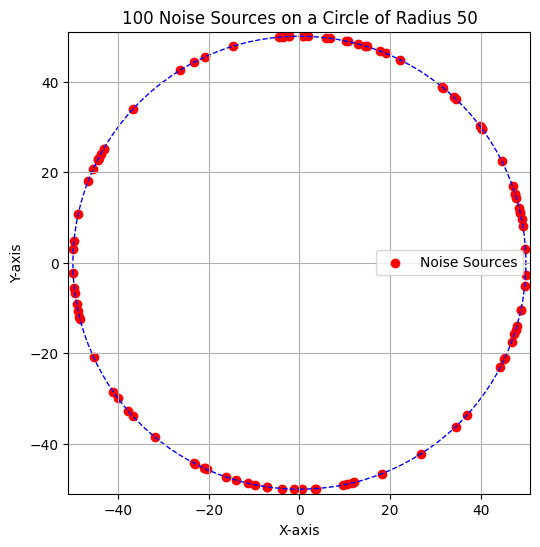

In [8]:
def sample_y(N, L=50):
    # Simulation: Generate N noise sources uniformly on a circle of radius L
    theta = np.random.uniform(0, 2 * np.pi, N)  # Random angles

    # Compute x, y coordinates
    x = L * np.cos(theta)
    y = L * np.sin(theta)

    sources = np.column_stack((x, y))

    return sources, x, y

N = 100
L = 50
sources, x, y = sample_y(N)

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x, y, color='red', label='Noise Sources')  # Plot points
circle = plt.Circle((0, 0), L, color='blue', fill=False, linestyle='dashed')  # Draw the circle
ax.add_patch(circle)

# Formatting
ax.set_xlim(-L-1, L+1)
ax.set_ylim(-L-1, L+1)
ax.set_aspect('equal')  # Equal aspect ratio
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_title(f"{N} Noise Sources on a Circle of Radius {L}")
plt.legend()
plt.grid(True)
plt.show()

On peut désormais construire les $n_s(t)$, qui, on le rappelle, are independently and identically emitted signals by each of these points ($\bm{y}_s$) with stationary Gaussian statistics, mean zero, and covariance function $F(t - t')$. Pour un ensemble de dates d'émission régulières $t_k = \frac{k}{T-1}$ pour $k \in \{0, ..., T-1\}$, on a 
$$ 
F =
\begin{bmatrix}
F(0) & F(t_1 - t_2) & F(t_1 - t_3) & \dots & F(t_1 - t_T) \\
F(t_2 - t_1) & F(0) & F(t_2 - t_3) & \dots & F(t_2 - t_T) \\
F(t_3 - t_1) & F(t_3 - t_2) & F(0) & \dots & F(t_3 - t_T) \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
F(t_T - t_1) & F(t_T - t_2) & F(t_T - t_3) & \dots & F(0)
\end{bmatrix} \in \mathbb{R}^{T \times T}
$$

In [10]:
def covariance_matrix_T(T):
    """
    Calcule la matrice de covariance pour des t_i = i avec une fonction de covariance F(t).
    
    Arguments :
    - F : fonction de covariance F(t)
    - N : taille de la matrice (nombre de points)
    
    Retourne :
    - Matrice de covariance NxN
    """
    dates = np.arange(0, T)/(T-1)  # t_i = i
    F_matrix = np.zeros((T, T))

    for i in range(T):
        for j in range(T):
            F_matrix[i, j] = F(dates[i] - dates[j])

    return F_matrix

def n_s(T, N):
    """
    return a signal of length T
    """
    signals = [0]*N
    cov_F = covariance_matrix_T(T)
    for s in len(N):
        signals[s] = [np.random.multivariate_normal(mean=np.zeros(cov_F.shape[0]), cov=cov_F) for _ in range(T)]

    return signals

def n_x(x, y_s, T):
    """
    x has to be a tuple (x1, x2) as we are currently working in R^2
    """
    N = len(y_s)
    dates = np.arange(0, T)/(T-1)  # t_i = i
    res = [1/np.sqrt(N)]*T
    n_s = n_s(T, N)

    for index, t in enumerate(dates): 
        for s, source in y_s:
            delta = int((x[0] == source[0] and x[1] == source[1]))
            res[index] += delta * n_s[s][index]

    return res

N'oublions pas notre objectif initial qui était de pouvoir définir une routine pour calculer
$$
u(t, \bm{x}) = \int_{-\infty}^t \int_{\mathbb{R}^2} G(t-s, \bm{x}, \bm{y}) n(s, \bm{y}) d\bm{y} ds.
$$
C'est désormais possible puisque l'on sait calculer $n$ et $G$. On approxime l'intégrale par Monte-Carlo sur $N_\text{samples}$.

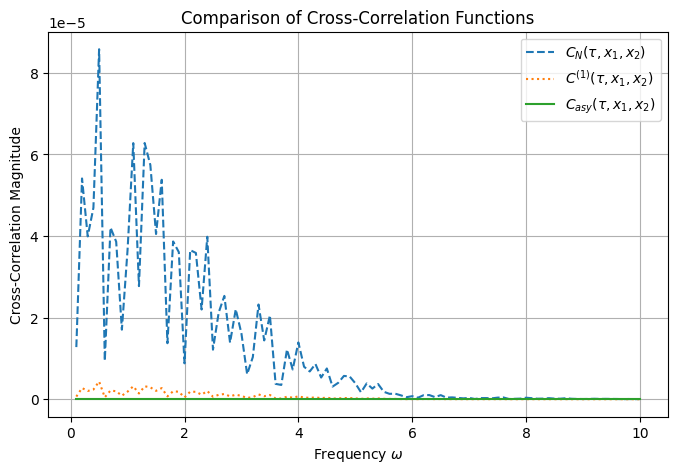

In [ ]:

# Receiver positions
x1 = np.array([10, 0])
x2 = np.array([-10, 0])

# Compute C_N (Expectation of empirical cross-correlation)
CN = np.zeros_like(omega, dtype=complex)
for y in sources:
    CN += F_hat(omega) * G_hat(omega, x1, y) * np.conj(G_hat(omega, x2, y))
CN /= N  # Normalize

# Compute C^(1) (Expectation over noise and source positions)
C1 = np.zeros_like(omega, dtype=complex)
for y in sources:
    C1 += F_hat(omega) * G_hat(omega, x1, y) * np.conj(G_hat(omega, x2, y))
C1 /= (4 * np.pi**2 * L)

# Compute C_asy from equation (6)
F_G_G = np.convolve(F_hat(omega), G_hat(omega, x1, x2), mode='same')
F_G_G_neg = np.convolve(F_hat(omega), G_hat(omega, x2, x1), mode='same')
Casy = (-c0 / (8 * np.pi**2 * L)) * (F_G_G - F_G_G_neg)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(omega, np.abs(CN), label='$C_N(\\tau, x_1, x_2)$', linestyle='dashed')
plt.plot(omega, np.abs(C1), label='$C^{(1)}(\\tau, x_1, x_2)$', linestyle='dotted')
plt.plot(omega, np.abs(Casy), label='$C_{asy}(\\tau, x_1, x_2)$', linestyle='solid')
plt.xlabel('Frequency $\\omega$')
plt.ylabel('Cross-Correlation Magnitude')
plt.legend()
plt.title('Comparison of Cross-Correlation Functions')
plt.grid()
plt.show()